In [78]:
#!pip install ultralytics

In [79]:
#!unzip /content/vehicles.v2-release.yolov8.zip

In [80]:
import os
import random
from PIL import Image


In [81]:
base_dir = '/content/train'

data_dir = os.path.join(base_dir,'images')
test_dir = ('/content/test/images')

In [82]:
data = os.listdir(data_dir)

image_files = [f for f in data if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

print(data[:10])


['adit_mp4-1638_jpg.rf.2916d7430f704d1725d3f516f6e6e141.jpg', 'malam_04112021_mp4-518_jpg.rf.08e8d63203303c204caa4d49e21613f0.jpg', 'siang_15112021_1_mp4-202_jpg.rf.c13e63dca2947dbf8e40f566f9c1d4a5.jpg', 'siang_15112021_1_mp4-244_jpg.rf.48a3e4e1c504fbb0c1e34ed242607ef8.jpg', 'malam_04112021_mp4-288_jpg.rf.79045266a6c4237f13ad084c6a76d45d.jpg', 'aditganteng_mp4-406_jpg.rf.4122f9a55f94cd8b7664a1ecc07d235f.jpg', 'adit_mp4-2729_jpg.rf.aba3125587053185abf9c119390ce40e.jpg', 'adit_mp4-2642_jpg.rf.d5c2d15defa620c2914ebe01bacc6f12.jpg', 'pagi_16112021_mp4-319_jpg.rf.df379aa7e0cca263bf4801dfe2682aca.jpg', 'adit_mp4-117_jpg.rf.651b88086002bd1ccef12dad04846480.jpg']


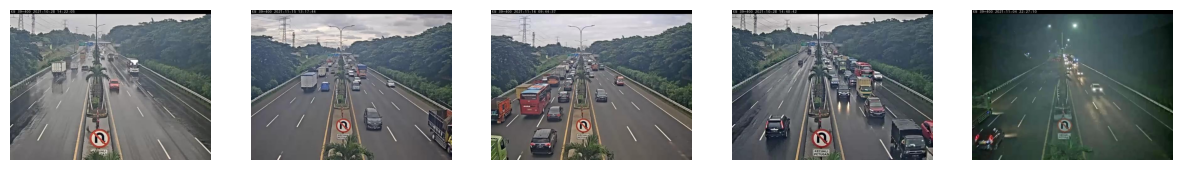

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

number_of_images_to_display = min(5, len(image_files))

random_images = random.sample(image_files, number_of_images_to_display)

fig, axes = plt.subplots(1, number_of_images_to_display, figsize=(15,5))

for i, image_name in enumerate(random_images):
  image_path = os.path.join(data_dir, image_name)
  img = mpimg.imread(image_path)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.show()


In [84]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

In [85]:
results = model.train(data='/content/data.yaml', epochs=10,)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/train/labels.cache... 2634 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2634/2634 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/train/images/adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e.jpg: 2 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.49G      1.464      2.351      1.142        118        640: 100%|██████████| 165/165 [01:10<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.13it/s]


                   all        966      13450      0.336      0.318      0.181      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.28G      1.342      1.445       1.09         97        640: 100%|██████████| 165/165 [00:56<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.76it/s]


                   all        966      13450      0.413      0.318      0.271      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.25G      1.314      1.284      1.081        114        640: 100%|██████████| 165/165 [00:58<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.93it/s]


                   all        966      13450      0.334      0.431      0.336      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.28G      1.283      1.174      1.073        115        640: 100%|██████████| 165/165 [00:55<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.99it/s]


                   all        966      13450       0.37      0.408      0.354      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.25G      1.255      1.066      1.059        123        640: 100%|██████████| 165/165 [00:56<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.65it/s]


                   all        966      13450      0.378      0.443      0.368      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.25G      1.231      1.001       1.05        133        640: 100%|██████████| 165/165 [00:54<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  3.04it/s]


                   all        966      13450      0.403      0.446      0.381      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.26G       1.21     0.9481      1.048        107        640: 100%|██████████| 165/165 [00:56<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]


                   all        966      13450      0.374      0.511      0.378      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.27G      1.192     0.8977      1.038        106        640: 100%|██████████| 165/165 [01:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  3.09it/s]


                   all        966      13450      0.468      0.438      0.386      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.26G      1.171     0.8545      1.033        113        640: 100%|██████████| 165/165 [01:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.64it/s]


                   all        966      13450      0.426      0.507      0.394      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.26G      1.157     0.8266      1.024        125        640: 100%|██████████| 165/165 [01:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        966      13450      0.444       0.53      0.411      0.282

10 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:26<00:00,  1.16it/s]


                   all        966      13450      0.444      0.527       0.41      0.282
               big bus        210        273       0.78      0.571      0.732      0.525
             big truck        404       1162      0.712      0.533      0.624       0.39
                bus-l-          8          8     0.0417      0.625     0.0424     0.0204
                bus-s-         12         12       0.26      0.469      0.274      0.229
                   car        927       8537      0.793      0.751      0.816      0.488
             mid truck        118        257      0.538      0.222      0.254      0.191
             small bus         43         49     0.0888     0.0612     0.0494      0.033
           small truck        517       1721      0.653      0.522      0.583      0.358
              truck-l-        266        433      0.397      0.642      0.423      0.312
              truck-m-        331        629      0.369      0.704      0.388      0.283
              truck-s

In [89]:
# Access the DetMetrics object for bounding box metrics directly
metrics = results.box

# Now you can access the metrics
print(f"mAP50: {metrics.maps[0]:.4f}")  # Access mAP50
print(f"Precision: {metrics.mean_results()[0]:.4f}")  # Access mean precision
print(f"Recall: {metrics.mean_results()[1]:.4f}")  # Access mean recall



mAP50: 0.5255
Precision: 0.4439
Recall: 0.5302



image 1/1 /content/test/images/malam_04112021_mp4-347_jpg.rf.45aed0b0d82c43ef94be8fdc5a72a9e8.jpg: 480x640 2 cars, 1 truck-m-, 30.4ms
Speed: 2.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test/images/adit_mp4-1124_jpg.rf.ea849b0907f1597ab2967b2f1ac4bf7a.jpg: 480x640 5 big trucks, 13 cars, 2 small trucks, 14.0ms
Speed: 1.6ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test/images/adit_mp4-2161_jpg.rf.fe91211d315694fd4cf08badf16bf9fb.jpg: 480x640 9 cars, 3 truck-m-s, 2 truck-s-s, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test/images/adit_mp4-1164_jpg.rf.bcd971fc90ca37bdab09f49b8101d19d.jpg: 480x640 1 big truck, 7 cars, 1 small truck, 4 truck-l-s, 2 truck-m-s, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test

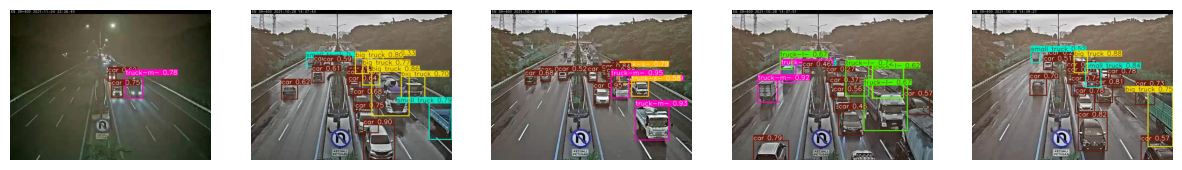

In [90]:
# prompt: i wana do a test for image and i wana to see it for many image show it

import matplotlib.pyplot as plt
# Assuming 'test_dir' from preceding code contains test images
test_data = os.listdir(test_dir)
test_image_files = [f for f in test_data if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

number_of_images_to_display = min(5, len(test_image_files))
random_test_images = random.sample(test_image_files, number_of_images_to_display)

# Load the trained model

fig, axes = plt.subplots(1, number_of_images_to_display, figsize=(15, 5))

for i, image_name in enumerate(random_test_images):
  image_path = os.path.join(test_dir, image_name)
  results = model(image_path)  # Perform inference

  # Visualize the results on the image
  res_plotted = results[0].plot()
  axes[i].imshow(res_plotted)
  axes[i].axis('off')

plt.show()



0: 480x640 1 big truck, 6 cars, 1 truck-m-, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


array([[[ 0,  0,  0],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  9,  9],
        [ 1,  1,  1],
        [ 7,  7,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [ 6,  6,  6],
        [ 3,  3,  3],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[80, 82, 83],
        [80, 82, 83],
        [80, 82, 83],
        ...,
        [61, 69, 69],
        [61, 69, 69],
        [61, 69, 69]],

       [[80, 82, 83],
        [80, 82, 83],
        [80, 82, 83],
        ...,
        [61, 69, 69],
        [61, 69, 69],
        [62, 70, 70]],

       [[80, 82, 83],
        [80, 82, 83],
        [80, 82, 83],
        ...,
        [61, 69, 69],
        [61, 69, 69],
        [62, 70, 70]]], dtype=uint8)
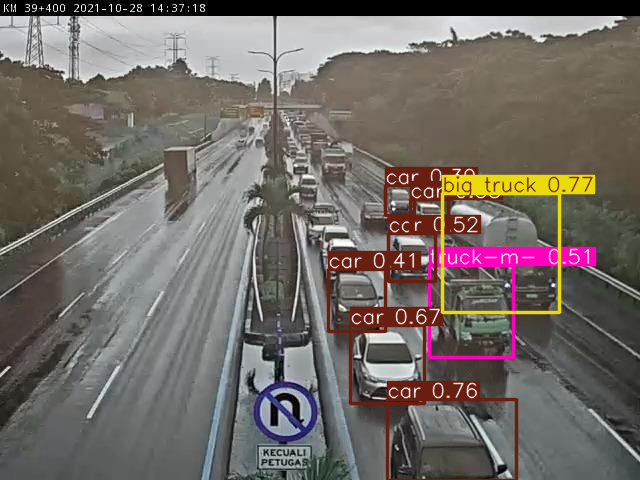

In [94]:
img = Image.open('/content/test/images/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg')
results = model(img)
results[0].plot()